### Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Step 1: Importing required libraries and the dataset

In [8]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


we have two columns contaning the number of hours and scores. Hence, we will be trying to predict the scores of the student based on just one single feature which is number of study hours. The linear regression which only considers the use of one feature to predict the result is called **Simple Linear Regression**

## Step 2: Data Visualisation

In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


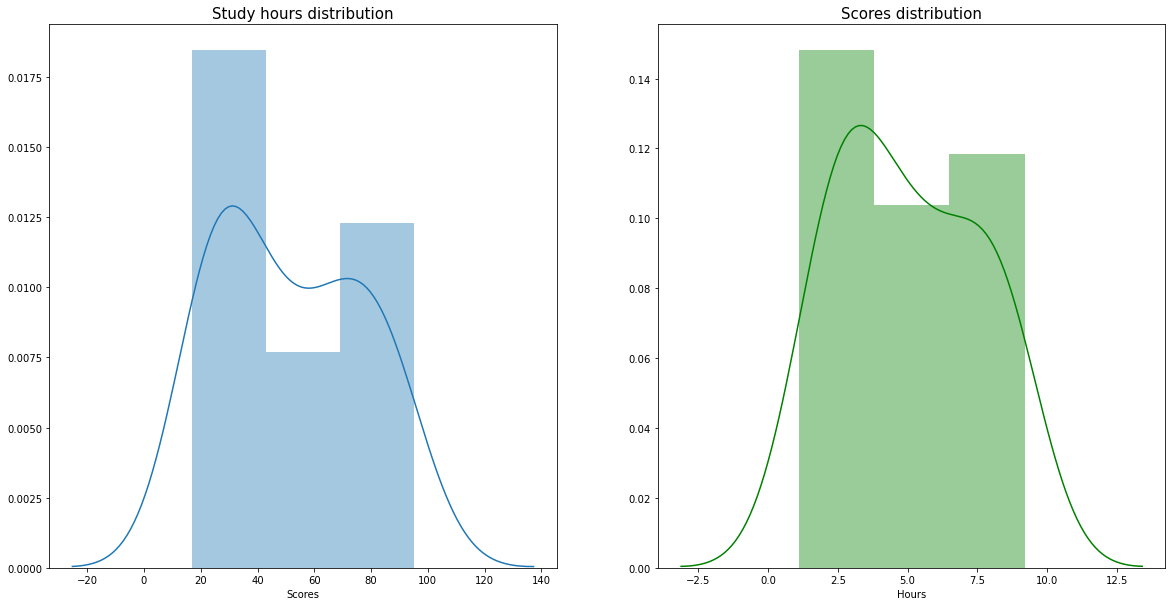

In [44]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.distplot(data["Scores"],ax=ax1)
sns.distplot(data["Hours"],ax=ax2,color='green')
ax1.set_title('Study hours distribution',size=15)
ax2.set_title('Scores distribution',size=15);



From the above distplot, we can see that a high density of scores are between 20-40.
In study hours high density of study hours ranges from 1-3 hours.

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

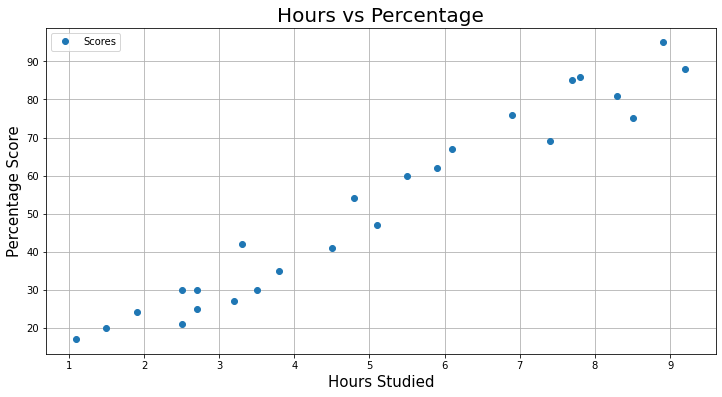

In [110]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',figsize=(12,6))  
plt.title('Hours vs Percentage',size=20)  
plt.xlabel('Hours Studied',size=15)  
plt.ylabel('Percentage Score',size=15) 
plt.grid()
plt.show();

Let's see how the study hours are related to scores through a regplot.



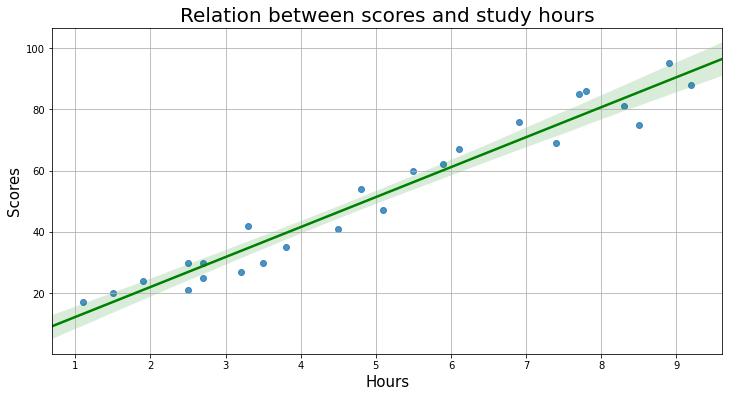

In [106]:
plt.figure(figsize=(12,6))
sns.regplot(data['Hours'],data['Scores'],line_kws={'color':'green','linewidth':2.5},truncate=False)
plt.xlabel('Hours',size=15)
plt.ylabel('Scores',size=15)
plt.grid()
plt.title('Relation between scores and study hours',size=20);

**From the graphs above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Step 3: Preparing the data and Training the Algorithm

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [45]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

In [67]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [82]:
w=regressor.coef_
w

array([9.91065648])

In [83]:
b=regressor.intercept_
b

2.018160041434683

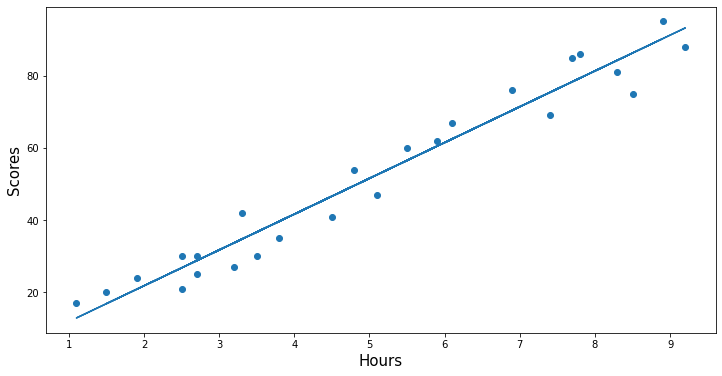

In [115]:
# Plotting the regression line
line = w*X+b

# Plotting for the test data
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours',size=15)
plt.ylabel('Scores',size=15)
plt.show()

## Step 4: Making Predictions

In [50]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [79]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,
                   'abs error':abs(y_test-y_pred),
                   '% error':(100*(abs(y_test-y_pred)/y_test)) })  
df 

,Actual,Predicted,abs error,% error
0,20,16.884145,3.115855,15.579276
1,27,33.732261,6.732261,24.934299
2,69,75.357018,6.357018,9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [68]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict(np.array([9.25]).reshape(-1,1))
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Step 5: Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [80]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
      
print("Root Mean Squared Error:",
      np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
      

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665


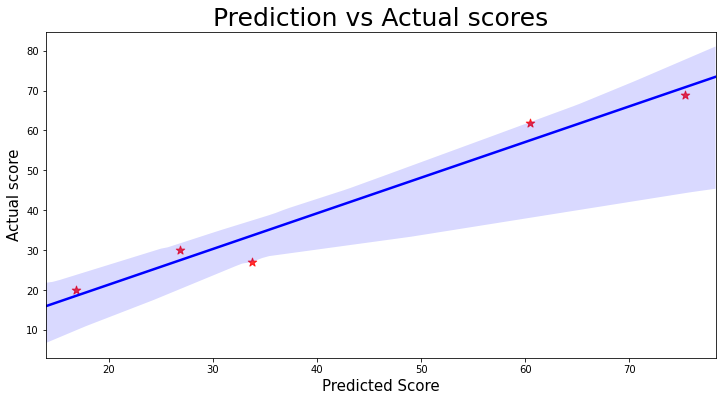

In [116]:
plt.figure(figsize=(12,6))
sns.regplot('Predicted','Actual',data=df,
            line_kws={'color':'blue','linewidth':2.5},
            scatter_kws={'color':'red','s':80},marker='*',truncate=False)
plt.xlabel('Predicted Score',size=15)
plt.ylabel('Actual score',size=15)
plt.title('Prediction vs Actual scores',size=25);

## Step 6: Conclusion

The **root mean squared error** of the predictions is **4.64** 

The **mean absolute error** is **4.18**

The **predicted score** of a student who studies for **9.25** hours is **93.69** according to the simple linear regression algorithm